# Network Analysis

Import packages

In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import nx_tools_Haley as nxt
from importlib import reload

In [2]:
import nx_tools_Haley as nxt
reload(nxt)

<module 'nx_tools' from '/Users/haleyroberts/Desktop/645/Project/coffee-brand-analysis-ANLY645/Code/nx_tools.py'>

## Data Set-Up

### Set Colors

In [4]:
sbux_green = '#00704A'
sbux_black = '#27251F'
dd_orange = '#FF671F'
dd_pink = '#DA1884'
dd_brown = '#653819'

### Read in data

In [3]:
#G_sampled = nx.read_gml("../Data/G_data_sampled.gml")
G = nx.read_gml("../Data/G_data.gml")
print("~~~ Complete Network ~~~")
print("Number of Nodes: ", len(G.nodes))
print("Number of Edges: ", len(G.edges))

~~~ Complete Network ~~~
Number of Nodes:  11167
Number of Edges:  302028


See attributes of nodes

In [6]:
print(G.nodes['S2'])

{'text_split': ['chang', 'bestfriend', 'cheap', 'give', 'got', 'trust', 'ass', 'starbuck', 'half', 'friendship', 'u', 'thank', 'date', 'ex', 'admit', 'old', 'liter', 'jealou', 'special', 'want', 'end', 'bracelet', 'miss', 'dear', 'life', 'year'], 'brand': 'starbucks', 'influencer_status': 'No', 'sentiment': 'positive', 'user_followers_count': 4, 'retweet_count': 0, 'favorite_count': 0, 'num_unique_words': 26, 'normalized_degree': 1.1538461538461537}


### Split Network into Dunkin & Starbucks Subnetworks

Get network of starbucks nodes only

In [4]:
nodes_sbux = (node 
              for node, data
              in G.nodes(data=True)
              if data.get("brand") == "starbucks")
G_sbux = G.subgraph(nodes_sbux)
print("~~~ Starbucks Network ~~~")
print("Number of Nodes: ", len(G_sbux.nodes))
print("Number of Edges: ", len(G_sbux.edges))

~~~ Starbucks Network ~~~
Number of Nodes:  5756
Number of Edges:  178923


Get network of dunkin nodes only

In [5]:
nodes_dd = (node 
              for node, data
              in G.nodes(data=True)
              if data.get("brand") == "dunkin")
G_dd = G.subgraph(nodes_dd)
print("~~~ Dunkin Network ~~~")
print("Number of Nodes: ", len(G_dd.nodes))
print("Number of Edges: ", len(G_dd.edges))

~~~ Dunkin Network ~~~
Number of Nodes:  5411
Number of Edges:  97487


### Get GCC of Each Network

GCC of Complete Network:

In [6]:
GCC = nxt.isolate_GCC(G)
print("~~~ Complete Network GCC ~~~")
print("Number of Nodes: ", len(GCC.nodes))
print("Number of Edges: ", len(GCC.edges))

~~~ Complete Network GCC ~~~
Number of Nodes:  10876
Number of Edges:  301674


In [23]:
print("Percent of Nodes in Complete GCC:")
print(round(len(GCC.nodes)/len(G.nodes)*100,2), '%')

Percent of Nodes in Complete GCC:
97.39 %


GCC of Starbucks Network:

In [7]:
G_sbux_GCC = nxt.isolate_GCC(G_sbux)
print("~~~ Starbucks GCC ~~~")
print("Number of Nodes: ", len(G_sbux_GCC.nodes))
print("Number of Edges: ", len(G_sbux_GCC.edges))

~~~ Starbucks GCC ~~~
Number of Nodes:  5534
Number of Edges:  178764


In [25]:
print("Percent of Nodes in Starbucks GCC:")
print(round(len(G_sbux_GCC.nodes)/len(G_sbux.nodes)*100,2), '%')

Percent of Nodes in Starbucks GCC:
96.14 %


GCC of Dunkin Network:

In [8]:
G_dd_GCC = nxt.isolate_GCC(G_dd)
print("~~~ Dunkin GCC ~~~")
print("Number of Nodes: ", len(G_dd_GCC.nodes))
print("Number of Edges: ", len(G_dd_GCC.edges))

~~~ Dunkin GCC ~~~
Number of Nodes:  5197
Number of Edges:  97265


In [26]:
print("Percent of Nodes in Dunkin GCC:")
print(round(len(G_dd_GCC.nodes)/len(G_dd.nodes)*100,2), '%')

Percent of Nodes in Dunkin GCC:
96.05 %


## Plotting Networks

Set plot title sizes

In [9]:
main_title_size = 20
sub_title_sizes = 16
image_pathway='../images/'
fig_type='.png'

### Complete Network - Colored by Brand

Get colors for nodes & edges

In [13]:
node_color_brands = []
for node in GCC.nodes(data=True):
    if 'starbucks' in node[1]['brand']:
        node_color_brands.append(sbux_green)
    elif 'dunkin' in node[1]['brand']:
        node_color_brands.append(dd_pink)

Plot Complete Network - Random Layout

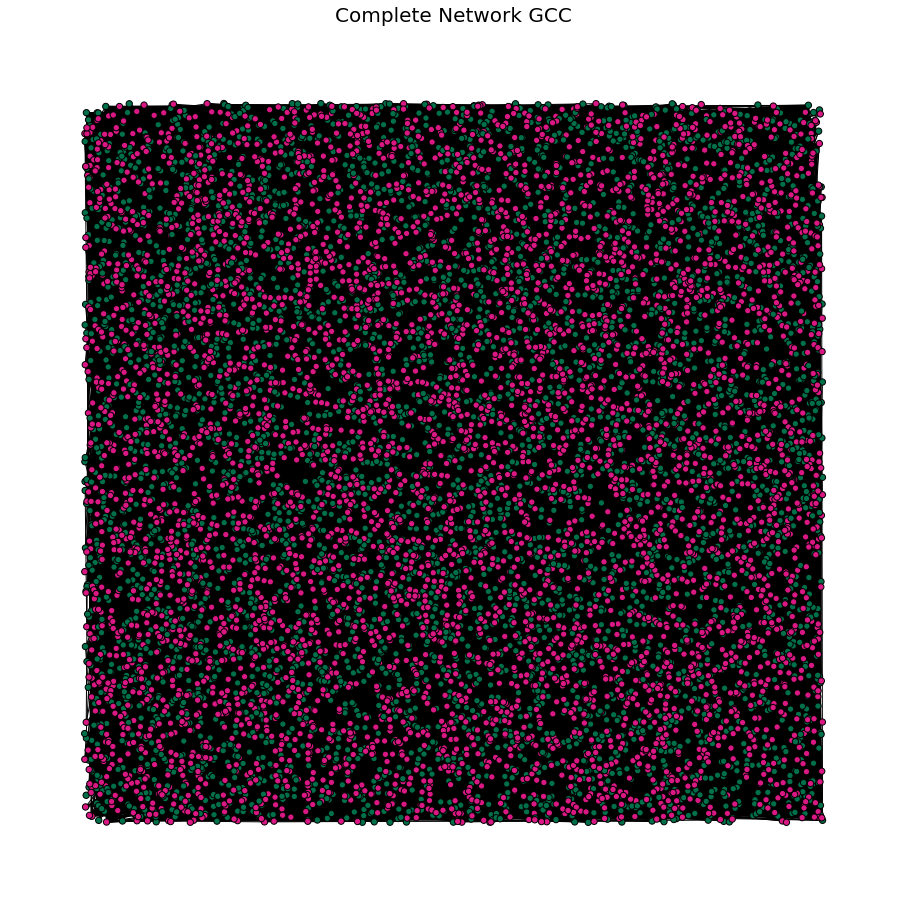

In [14]:
nxt.plot_network(GCC,
                 image_save_name=image_pathway+'complete_random'+fig_type,
                 title='Complete Network GCC',
                 title_font_size=main_title_size,
                 node_colors=node_color_brands,
                 # node_sizes=40,
                 # edge_colors='black',
                 # fig_size_w=16,
                 # fig_size_h=16,
                 # layout='random', 
                 # labels=False
                 )

Plot Complete Network - Spring Layout

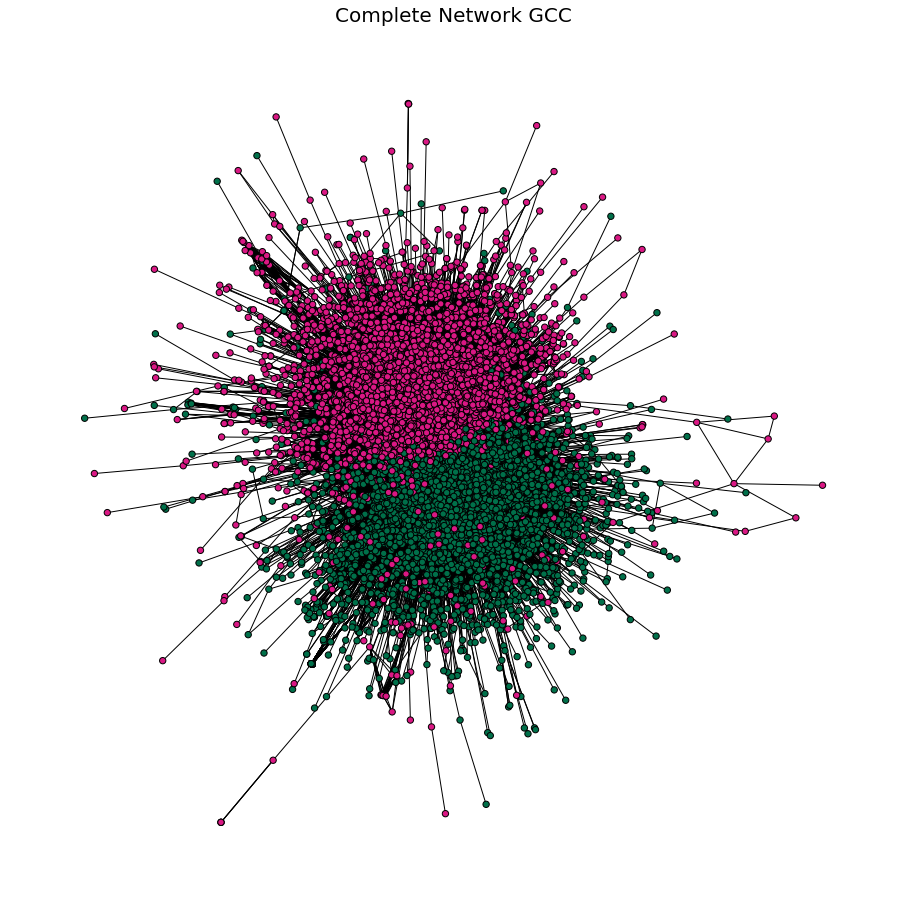

In [15]:
nxt.plot_network(GCC,
                 image_save_name=image_pathway+'complete_spring'+fig_type,
                 title='Complete Network GCC',
                 title_font_size=main_title_size,
                 node_colors=node_color_brands,
                 # node_sizes=40,
                 # edge_colors='black',
                 # fig_size_w=16,
                 # fig_size_h=16,
                 layout='spring', 
                 # labels=False
                 )

Plot Complete Network - Spring Layout - Sized by Number of Favorites

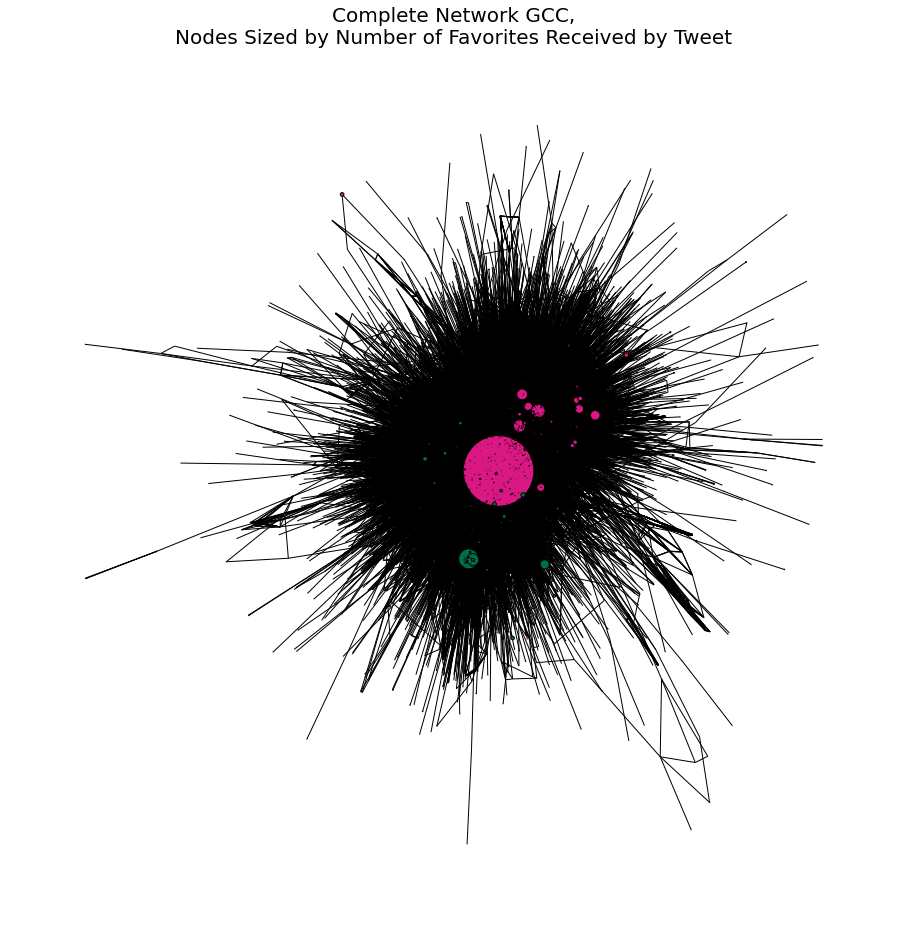

In [48]:
nxt.plot_network(GCC,
                 image_save_name=image_pathway+'complete_num_favs'+fig_type,
                 title='Complete Network GCC,\nNodes Sized by Number of Favorites Received by Tweet',
                 title_font_size=main_title_size,
                 node_colors=node_color_brands,
                 node_sizes='num_favorites',
                 # edge_colors='black',
                 # fig_size_w=16,
                 # fig_size_h=16,
                 layout='spring', 
                 # labels=False
                 )

### Starbucks & Dunkin Subnetworks - Colored by Sentiment

Get colors for nodes & edges

In [18]:
node_color_sbux_sentiment = []
for node in G_sbux_GCC.nodes(data=True):
    if 'positive' in node[1]['sentiment']:
        node_color_sbux_sentiment.append('green')
    elif 'neutral' in node[1]['sentiment']:
        node_color_sbux_sentiment.append('yellow')
    elif 'negative' in node[1]['sentiment']:
        node_color_sbux_sentiment.append('red')

node_color_dd_sentiment = []
for node in G_dd_GCC.nodes(data=True):
    if 'positive' in node[1]['sentiment']:
        node_color_dd_sentiment.append('green')
    elif 'neutral' in node[1]['sentiment']:
        node_color_dd_sentiment.append('yellow')
    elif 'negative' in node[1]['sentiment']:
        node_color_dd_sentiment.append('red')

Plot Subnetworks - Random Layout

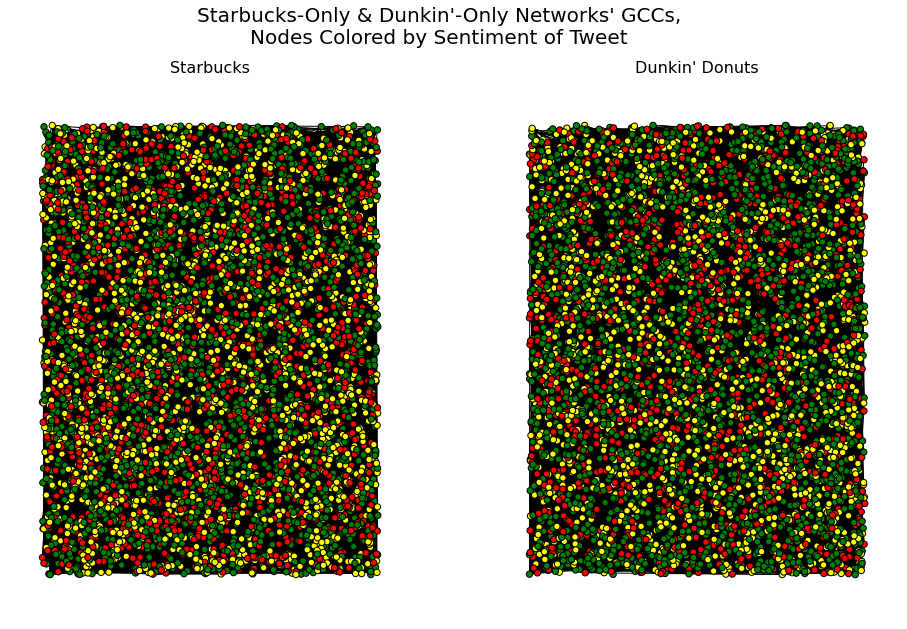

In [31]:
nxt.plot_two_networks(G_sbux_GCC,
                      G_dd_GCC,
                      image_save_name=image_pathway+'subs_random'+fig_type,
                      main_title="Starbucks-Only & Dunkin'-Only Networks' GCCs,\nNodes Colored by Sentiment of Tweet",
                      title_a="Starbucks",
                      title_b="Dunkin' Donuts",
                      main_title_font_size=main_title_size,
                      sub_titles_font_size=sub_title_sizes,
                      node_colors_a=node_color_sbux_sentiment,
                      node_colors_b=node_color_dd_sentiment,
                      # node_sizes_both=40,
                      # node_sizes_a=None,
                      # node_sizes_b=None,
                      # edge_colors='black',
                      # fig_size_w=16,
                      # fig_size_h=10,
                      # layout="random",
                      # labels=False
                      )

Plot Subnetworks - Spring Layout

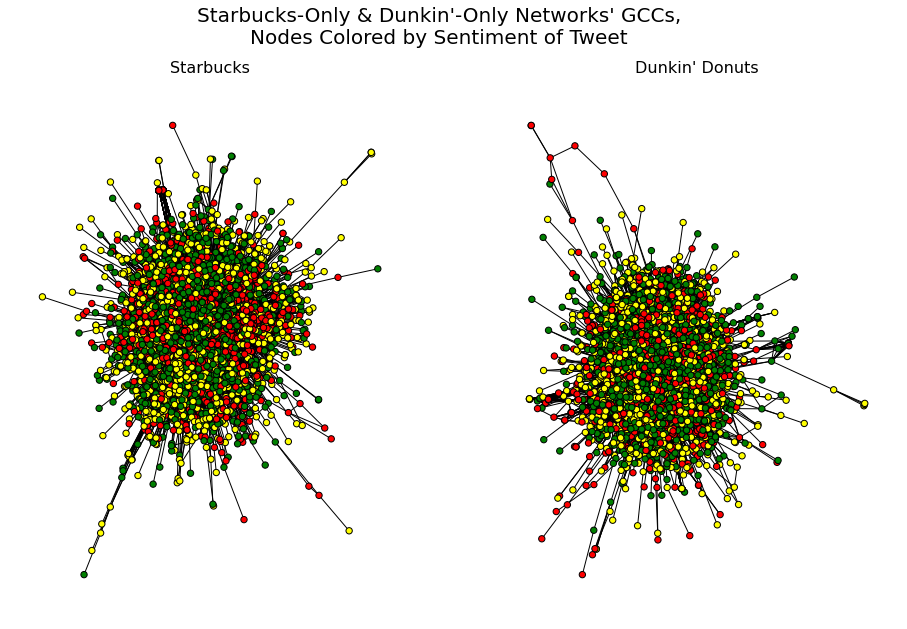

In [36]:
nxt.plot_two_networks(G_sbux_GCC,
                      G_dd_GCC,
                      image_save_name=image_pathway+'subs_spring'+fig_type,
                      main_title="Starbucks-Only & Dunkin'-Only Networks' GCCs,\nNodes Colored by Sentiment of Tweet",
                      title_a="Starbucks",
                      title_b="Dunkin' Donuts",
                      main_title_font_size=main_title_size,
                      sub_titles_font_size=sub_title_sizes,
                      node_colors_a=node_color_sbux_sentiment,
                      node_colors_b=node_color_dd_sentiment,
                      # node_sizes_both=40,
                      # node_sizes_a=None,
                      # node_sizes_b=None,
                      # edge_colors='black',
                      # fig_size_w=16,
                      # fig_size_h=10,
                      layout="spring",
                      # labels=False
                      )

### Plots Colored by Influencer Status

Get colors for nodes & edges

In [33]:
node_color_sbux_inf = []
node_sizes_sbux_inf = []
for node in G_sbux_GCC.nodes(data=True):
    if 'Yes' in node[1]['influencer_status']:
        node_color_sbux_inf.append(sbux_green)
        node_sizes_sbux_inf.append(120)
    elif 'No' in node[1]['influencer_status']:
        node_color_sbux_inf.append('grey')
        node_sizes_sbux_inf.append(30)

node_color_dd_inf = []
node_sizes_dd_inf = []
for node in G_dd_GCC.nodes(data=True):
    if 'Yes' in node[1]['influencer_status']:
        node_color_dd_inf.append(dd_pink)
        node_sizes_dd_inf.append(120)
    elif 'No' in node[1]['influencer_status']:
        node_color_dd_inf.append('grey')
        node_sizes_dd_inf.append(30)


Plot Subnetworks - Spring Layout

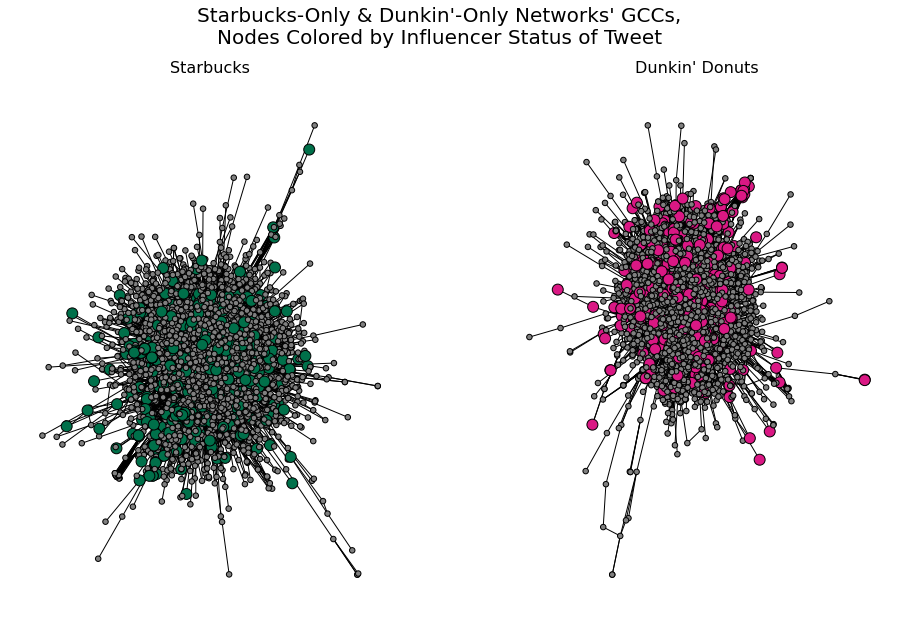

In [35]:
nxt.plot_two_networks(G_sbux_GCC,
                      G_dd_GCC,
                      image_save_name=image_pathway+'subs_influencers'+fig_type,
                      main_title="Starbucks-Only & Dunkin'-Only Networks' GCCs,\nNodes Colored by Influencer Status of Tweet",
                      title_a="Starbucks",
                      title_b="Dunkin' Donuts",
                      main_title_font_size=main_title_size,
                      sub_titles_font_size=sub_title_sizes,
                      node_colors_a=node_color_sbux_inf,
                      node_colors_b=node_color_dd_inf,
                      node_sizes_both='different',
                      node_sizes_a=node_sizes_sbux_inf,
                      node_sizes_b=node_sizes_dd_inf,
                      # edge_colors='black',
                      # fig_size_w=16,
                      # fig_size_h=10,
                      layout="spring",
                      # labels=False
                      )

### Nodes Sized by Degree Centrality

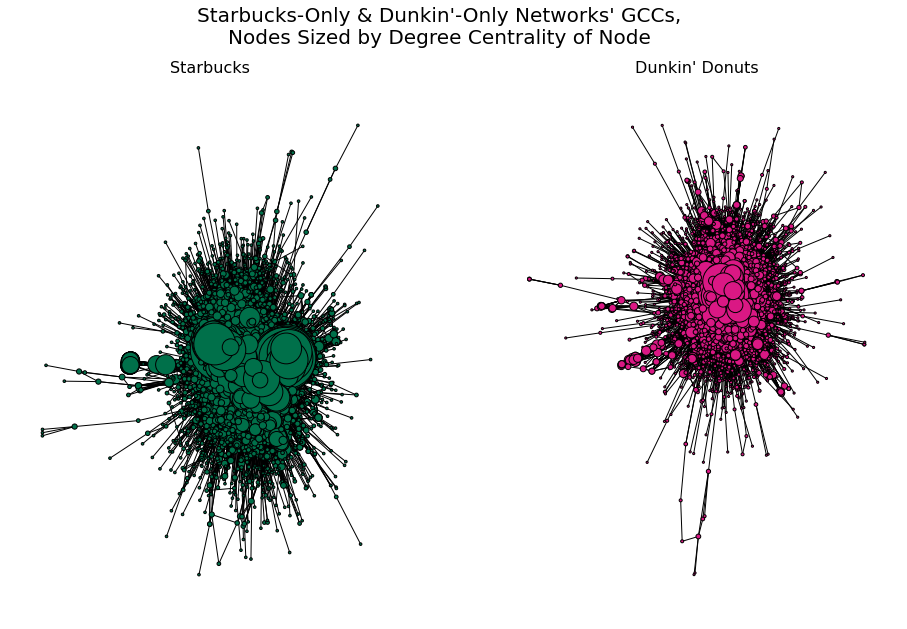

In [37]:
nxt.plot_two_networks(G_sbux_GCC,
                      G_dd_GCC,
                      image_save_name=image_pathway+'subs_degree'+fig_type,
                      main_title="Starbucks-Only & Dunkin'-Only Networks' GCCs,\nNodes Sized by Degree Centrality of Node",
                      title_a="Starbucks",
                      title_b="Dunkin' Donuts",
                      main_title_font_size=main_title_size,
                      sub_titles_font_size=sub_title_sizes,
                      node_colors_a=sbux_green,
                      node_colors_b=dd_pink,
                      node_sizes_both='degree',
                      # node_sizes_a=None,
                      # node_sizes_b=None,
                      # edge_colors='black',
                      # fig_size_w=16,
                      # fig_size_h=10,
                      layout="spring",
                      # labels=False
                      )

### Nodes Sized by Normalized Degree

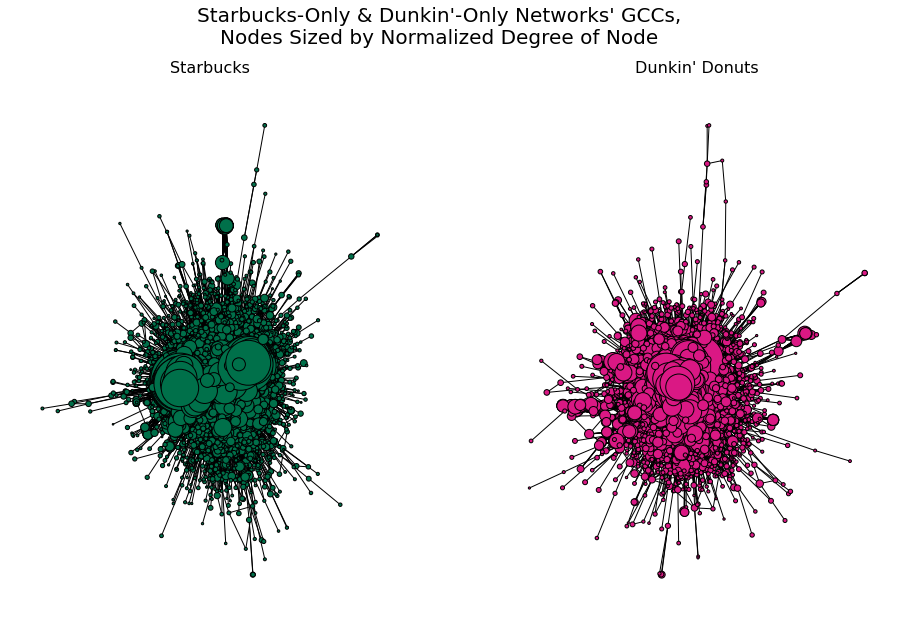

In [38]:
nxt.plot_two_networks(G_sbux_GCC,
                      G_dd_GCC,
                      image_save_name=image_pathway+'subs_degree_normalized'+fig_type,
                      main_title="Starbucks-Only & Dunkin'-Only Networks' GCCs,\nNodes Sized by Normalized Degree of Node",
                      title_a="Starbucks",
                      title_b="Dunkin' Donuts",
                      main_title_font_size=main_title_size,
                      sub_titles_font_size=sub_title_sizes,
                      node_colors_a=sbux_green,
                      node_colors_b=dd_pink,
                      node_sizes_both='normalized_degree',
                      # node_sizes_a=None,
                      # node_sizes_b=None,
                      # edge_colors='black',
                      # fig_size_w=16,
                      # fig_size_h=10,
                      layout="spring",
                      # labels=False
                      )

### Nodes Sized by Betweenness Centrality

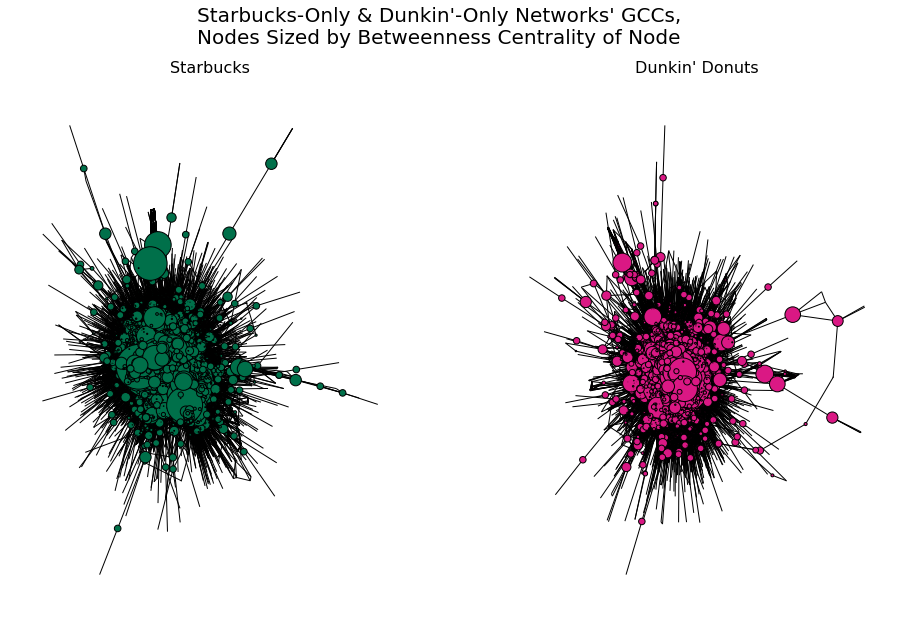

In [40]:
nxt.plot_two_networks(G_sbux_GCC,
                      G_dd_GCC,
                      image_save_name=image_pathway+'subs_betweenness'+fig_type,
                      main_title="Starbucks-Only & Dunkin'-Only Networks' GCCs,\nNodes Sized by Betweenness Centrality of Node",
                      title_a="Starbucks",
                      title_b="Dunkin' Donuts",
                      main_title_font_size=main_title_size,
                      sub_titles_font_size=sub_title_sizes,
                      node_colors_a=sbux_green,
                      node_colors_b=dd_pink,
                      node_sizes_both='betweenness',
                      # node_sizes_a=None,
                      # node_sizes_b=None,
                      # edge_colors='black',
                      # fig_size_w=16,
                      # fig_size_h=10,
                      layout="spring",
                      # labels=False
                      )

### Nodes Sized by Closeness Centrality

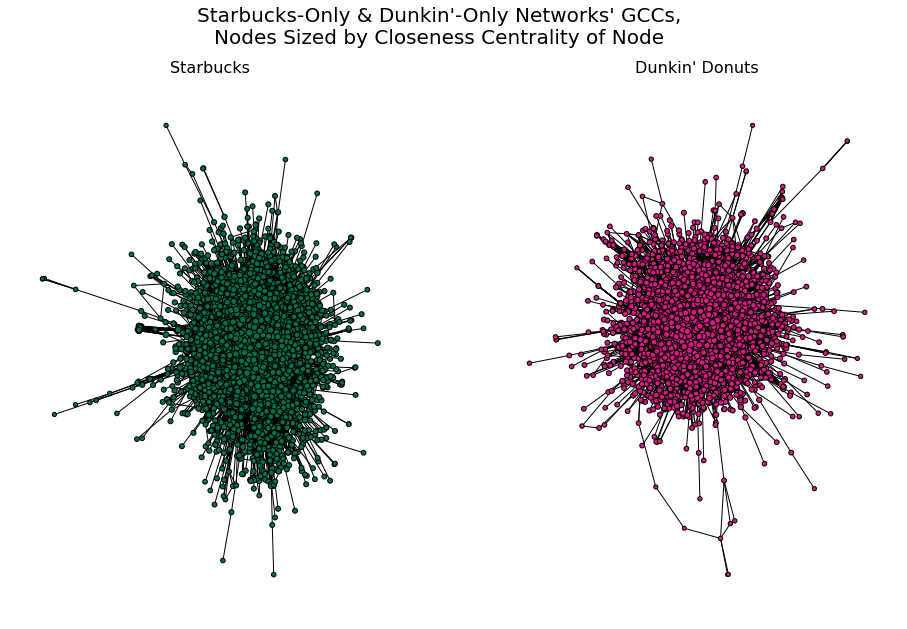

In [54]:
nxt.plot_two_networks(G_sbux_GCC,
                      G_dd_GCC,
                      image_save_name=image_pathway+'subs_closeness'+fig_type,
                      main_title="Starbucks-Only & Dunkin'-Only Networks' GCCs,\nNodes Sized by Closeness Centrality of Node",
                      title_a="Starbucks",
                      title_b="Dunkin' Donuts",
                      main_title_font_size=main_title_size,
                      sub_titles_font_size=sub_title_sizes,
                      node_colors_a=sbux_green,
                      node_colors_b=dd_pink,
                      node_sizes_both='closeness',
                      # node_sizes_a=None,
                      # node_sizes_b=None,
                      # edge_colors='black',
                      # fig_size_w=16,
                      # fig_size_h=10,
                      layout="spring",
                      # labels=False
                      )

### Nodes Sized by Number of Followers

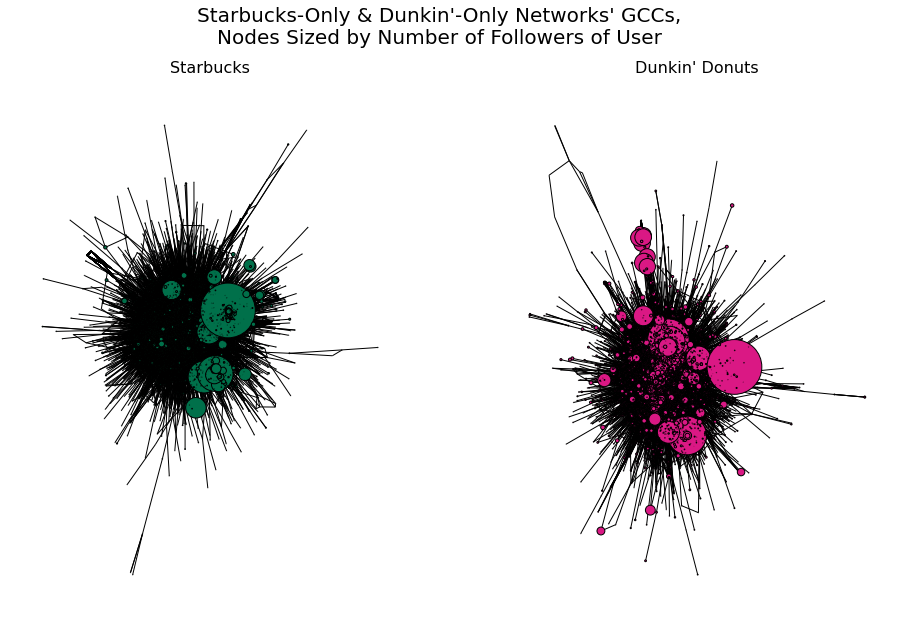

In [49]:
nxt.plot_two_networks(G_sbux_GCC,
                      G_dd_GCC,
                      image_save_name=image_pathway+'subs_num_followers'+fig_type,
                      main_title="Starbucks-Only & Dunkin'-Only Networks' GCCs,\nNodes Sized by Number of Followers of User",
                      title_a="Starbucks",
                      title_b="Dunkin' Donuts",
                      main_title_font_size=main_title_size,
                      sub_titles_font_size=sub_title_sizes,
                      node_colors_a=sbux_green,
                      node_colors_b=dd_pink,
                      node_sizes_both='num_followers',
                      # node_sizes_a=None,
                      # node_sizes_b=None,
                      # edge_colors='black',
                      # fig_size_w=16,
                      # fig_size_h=10,
                      layout="spring",
                      # labels=False
                      )

### Nodes Sized by Number of Retweets

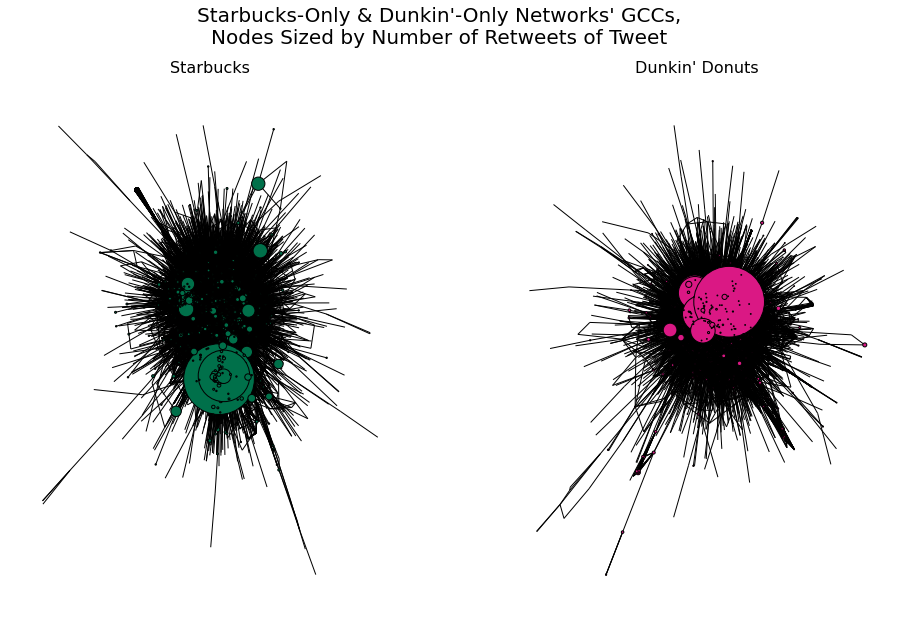

In [50]:
nxt.plot_two_networks(G_sbux_GCC,
                      G_dd_GCC,
                      image_save_name=image_pathway+'subs_num_retweets'+fig_type,
                      main_title="Starbucks-Only & Dunkin'-Only Networks' GCCs,\nNodes Sized by Number of Retweets of Tweet",
                      title_a="Starbucks",
                      title_b="Dunkin' Donuts",
                      main_title_font_size=main_title_size,
                      sub_titles_font_size=sub_title_sizes,
                      node_colors_a=sbux_green,
                      node_colors_b=dd_pink,
                      node_sizes_both='num_retweets',
                      # node_sizes_a=None,
                      # node_sizes_b=None,
                      # edge_colors='black',
                      # fig_size_w=16,
                      # fig_size_h=10,
                      layout="spring",
                      # labels=False
                      )

### Nodes Sized by Number of Favorites

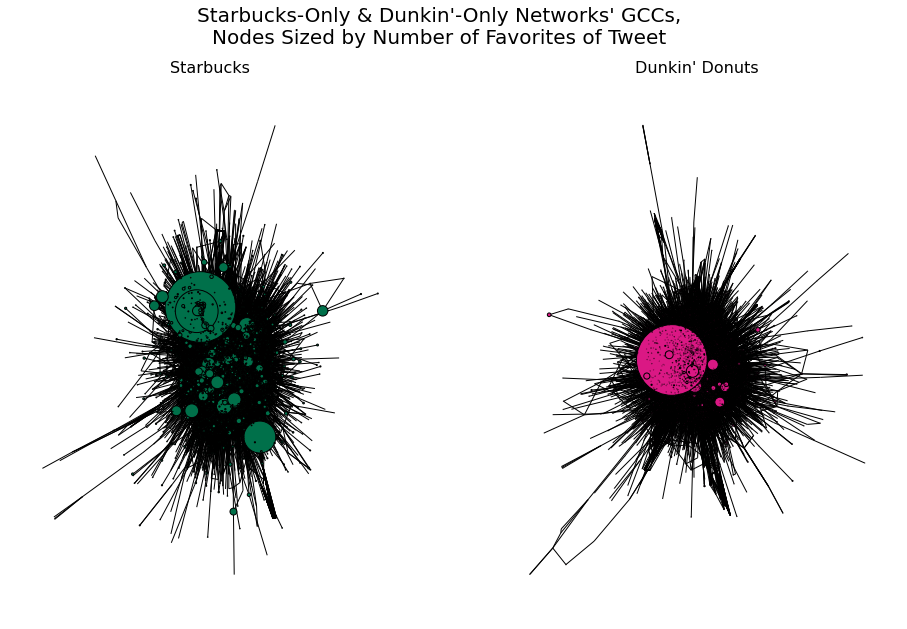

In [51]:
nxt.plot_two_networks(G_sbux_GCC,
                      G_dd_GCC,
                      image_save_name=image_pathway+'subs_num_favs'+fig_type,
                      main_title="Starbucks-Only & Dunkin'-Only Networks' GCCs,\nNodes Sized by Number of Favorites of Tweet",
                      title_a="Starbucks",
                      title_b="Dunkin' Donuts",
                      main_title_font_size=main_title_size,
                      sub_titles_font_size=sub_title_sizes,
                      node_colors_a=sbux_green,
                      node_colors_b=dd_pink,
                      node_sizes_both='num_favorites',
                      # node_sizes_a=None,
                      # node_sizes_b=None,
                      # edge_colors='black',
                      # fig_size_w=16,
                      # fig_size_h=10,
                      layout="spring",
                      # labels=False
                      )

## Get Network Summary Metrics

##### Starbucks GCC

In [12]:
# Betweenness
b = list(dict(nx.betweenness_centrality(G_sbux_GCC)).values())
print ('\n ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
print("Betweenness - Min: ", min(b))
print("Betweenness - Max: ", max(b))
# Closeness
cl = list(dict(nx.closeness_centrality(G_sbux_GCC)).values())
print ('\n ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
print("Closeness - Min: ", min(cl))
print("Closeness - Max: ", max(cl))
# Degree
degree = list(dict(nx.degree(G_sbux_GCC)).values())
print ('\n ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
print("Degree - Min: ", min(degree))
print("Degree - Max: ", max(degree))
# Normalized Degree
norm_degree = [data.get("normalized_degree") for node, data in G_sbux_GCC.nodes(data=True)]
print ('\n ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
print("Normalized Degree - Min: ", min(norm_degree))
print("Normalized Degree - Max: ", max(norm_degree))



 ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Betweenness - Min:  0.0
Betweenness - Max:  0.03979330514877757

 ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Closeness - Min:  0.1610302677532014
Closeness - Max:  0.4473641655886158

 ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Degree - Min:  1
Degree - Max:  586

 ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Normalized Degree - Min:  0.03571428571428571
Normalized Degree - Max:  56.666666666666664


In [18]:
# Favorites Count
num_fav = [data.get("favorite_count") for node, data in G_sbux_GCC.nodes(data=True)]
print ('\n ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
print("Favorites Count - Min: ", min(num_fav))
print("Favorites Count - Max: ", max(num_fav))
# Retweet Count
num_retweet = [data.get("retweet_count") for node, data in G_sbux_GCC.nodes(data=True)]
print ('\n ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
print("Retweet Count - Min: ", min(num_retweet))
print("Retweet Count - Max: ", max(num_retweet))
# User Follower Count
num_followers = [data.get("user_followers_count") for node, data in G_sbux_GCC.nodes(data=True)]
print ('\n ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
print("User Follower Count - Min: ", min(num_followers))
print("User Follower Count - Max: ", max(num_followers))



 ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Favorites Count - Min:  0
Favorites Count - Max:  13961

 ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Retweet Count - Min:  0
Retweet Count - Max:  2559

 ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
User Follower Count - Min:  0
User Follower Count - Max:  19997565


##### Dunkin GCC

In [13]:
# Betweenness
b = list(dict(nx.betweenness_centrality(G_dd_GCC)).values())
print ('\n ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
print("Betweenness - Min: ", min(b))
print("Betweenness - Max: ", max(b))
# Closeness
cl = list(dict(nx.closeness_centrality(G_dd_GCC)).values())
print ('\n ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
print("Closeness - Min: ", min(cl))
print("Closeness - Max: ", max(cl))
# Degree
degree = list(dict(nx.degree(G_dd_GCC)).values())
print ('\n ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
print("Degree - Min: ", min(degree))
print("Degree - Max: ", max(degree))
# Normalized Degree
norm_degree = [data.get("normalized_degree") for node, data in G_dd_GCC.nodes(data=True)]
print ('\n ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
print("Normalized Degree - Min: ", min(norm_degree))
print("Normalized Degree - Max: ", max(norm_degree))


 ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Betweenness - Min:  0.0
Betweenness - Max:  0.04480861910318444

 ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Closeness - Min:  0.15944030194237319
Closeness - Max:  0.49330675021361436

 ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Degree - Min:  1
Degree - Max:  877

 ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Normalized Degree - Min:  0.03333333333333333
Normalized Degree - Max:  41.44444444444444


In [19]:
# Favorites Count
num_fav = [data.get("favorite_count") for node, data in G_dd_GCC.nodes(data=True)]
print ('\n ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
print("Favorites Count - Min: ", min(num_fav))
print("Favorites Count - Max: ", max(num_fav))
# Retweet Count
num_retweet = [data.get("retweet_count") for node, data in G_dd_GCC.nodes(data=True)]
print ('\n ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
print("Retweet Count - Min: ", min(num_retweet))
print("Retweet Count - Max: ", max(num_retweet))
# User Follower Count
num_followers = [data.get("user_followers_count") for node, data in G_dd_GCC.nodes(data=True)]
print ('\n ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
print("User Follower Count - Min: ", min(num_followers))
print("User Follower Count - Max: ", max(num_followers))


 ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Favorites Count - Min:  0
Favorites Count - Max:  173566

 ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Retweet Count - Min:  0
Retweet Count - Max:  6761

 ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
User Follower Count - Min:  0
User Follower Count - Max:  3854868
